# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 팀 과제를 위해 필요합니다.

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [4]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [5]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [6]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

* KNN Imputer로 채울 예정.
    * KNN Imputer는 가변수화가 된 상태에서 사용 가능.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [7]:
dum_cols = ['ShelveLoc','US','Urban','Education']

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()


,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,139.0,111.0,5,310,132,62,0,0,1,1,0,0,1,0,0,0,0,0
1,143.0,21.0,5,81,160,67,0,1,1,0,0,1,0,0,0,0,0,0
2,114.0,NaN,0,97,125,29,0,1,0,1,0,1,0,0,0,0,0,0
3,119.0,88.0,10,170,101,61,0,1,1,1,0,0,1,0,0,0,0,0
4,136.0,81.0,15,425,120,67,1,0,1,1,0,0,0,0,0,0,0,0


* KNNImputer 수행

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)
# 데이터프레임으로 다시 만듭시다.
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
US_Yes              0
Urban_Yes           0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
dtype: int64

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

In [9]:
# 경쟁사와 가격 차 변수 만들기
x['Price_diff'] = x['CompPrice'] - x['Price']

In [10]:
# 


### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [11]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [12]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

# # 데이터프레임으로 다시 만듭시다.
# x_train_s = pd.DataFrame(x_train_s, columns=col_x)
# x_train_s.head()

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 사용하지 않은데 무조건 다 불러오는 것은 지양해주세요.

In [13]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Linear Regression 모델링

In [14]:
m_lr = LinearRegression()
m_lr.fit(x_train, y_train)

LinearRegression()

In [15]:
print(list(x_train))
print(m_lr.coef_)
print(m_lr.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'US_Yes', 'Urban_Yes', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Price_diff']
[ 2.61323292e-02  1.21998110e-02  1.27628185e-01  9.67454163e-05
 -3.73018451e-02 -5.07834258e-02  5.01859870e+00  1.99376564e+00
 -1.81825816e-01  1.72848306e-01 -6.55527985e-01 -3.25143410e-01
 -4.95736810e-01 -5.04397991e-01 -1.26372756e-01 -2.93201875e-01
 -4.67810327e-01 -5.92727532e-01  6.34341743e-02]
7.167716246347931


In [16]:
# 예측
val_pred_lr = m_lr.predict(x_val)
print(mean_absolute_error(y_val, val_pred_lr))

1.015646253398169


#### (2) Decision Tree 모델링

In [17]:
m_dt = DecisionTreeRegressor(max_depth=3)
m_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

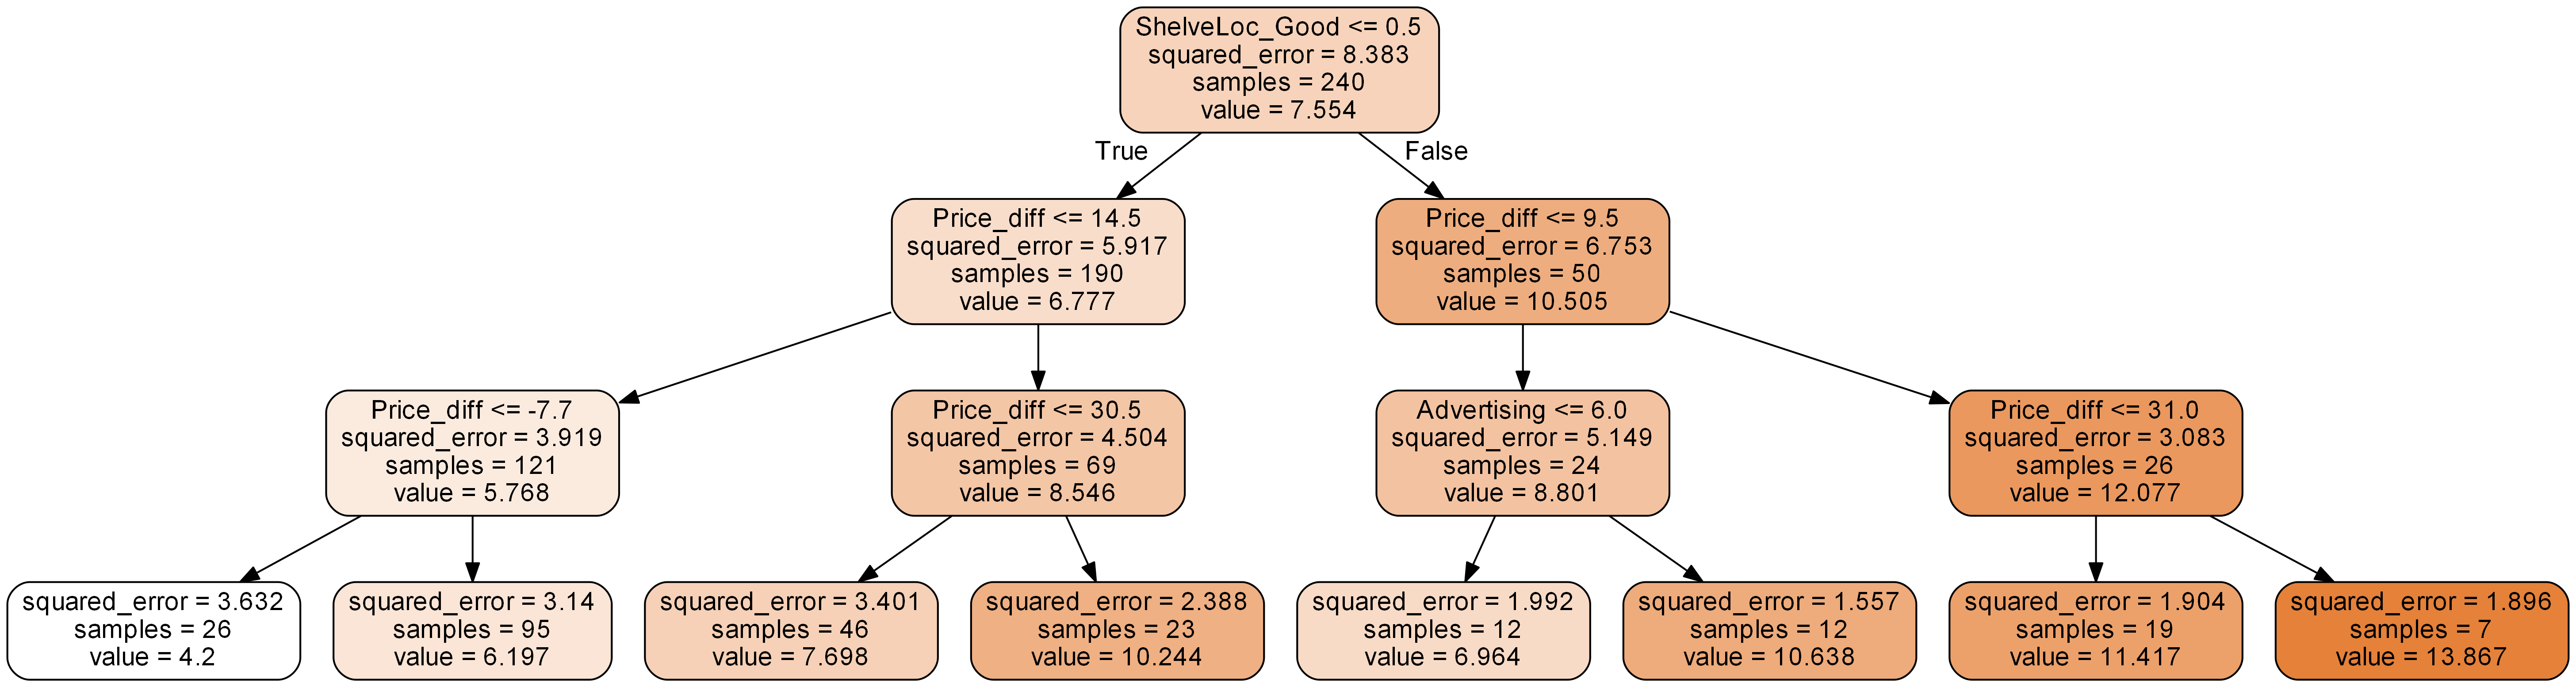

In [55]:
# 시각화
from sklearn.tree import export_graphviz

export_graphviz(m_dt  #<--여기에 모델이름 넣기
                , out_file = 'tree.dot'
                , feature_names = x_train.columns  # feature 이름
                , rounded = True, precision = 3, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi=300

#이미지 파일 로딩하기.
from IPython.display import Image
Image(filename = 'tree.png', width = 800)  # 사이즈 조정.

# 7일 전의 이용량과 2일전의 이용량 변수가 자주 사용되었음을 확인가능

In [19]:
train_mse, val_mse = [],[]

depth = list(range(1,20))
for d in depth :
    model_dt = DecisionTreeRegressor(max_depth = d)
    model_dt.fit(x_train, y_train)
    train_pred_dt = model_dt.predict(x_train)
    val_pred_dt = model_dt.predict(x_val)
    train_mse.append(mean_absolute_error(y_train, train_pred_dt))
    val_mse.append(mean_absolute_error(y_val, val_pred_dt))
    print(d)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


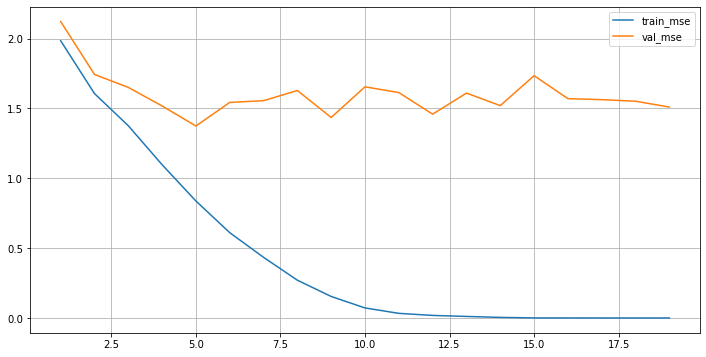

In [56]:
plt.figure(figsize = (12,6))
plt.plot(depth, train_mse, label = 'train_mse')
plt.plot(depth, val_mse, label = 'val_mse')
plt.legend()
plt.grid()
plt.show()
# 5 정도가 적당함을 확인 가능

In [21]:
model_dt = DecisionTreeRegressor(max_depth = 5)
model_dt.fit(x_train, y_train)
val_pred_dt = model_dt.predict(x_val)
print(mean_absolute_error(y_val, val_pred_dt))

1.3936721428571426


#### (3) KNN 모델링

In [22]:
m_knn = KNeighborsRegressor()

params = {'n_neighbors':range(2,20)}
m_knn_gs = GridSearchCV(m_knn, param_grid = params, scoring = 'neg_mean_absolute_error')

# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [23]:
m_knn_gs.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 20)},
             scoring='neg_mean_absolute_error')

In [24]:
m_knn_gs.best_params_

{'n_neighbors': 7}

In [25]:
val_pred_knn = m_knn_gs.predict(x_val_s)
print(mean_absolute_error(y_val, val_pred_knn))

2.0022619047619044


#### (4) SVM 모델링

In [26]:
m_svm = SVR()

params = {'C':[0.05, 0.1,0.2,1,5,10], 'gamma': [0.1,1,5,10]}
m_svm_gs = GridSearchCV(m_svm, param_grid = params, cv = 5, scoring = 'neg_mean_absolute_error')

In [27]:
m_svm_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.05, 0.1, 0.2, 1, 5, 10],
                         'gamma': [0.1, 1, 5, 10]},
             scoring='neg_mean_absolute_error')

In [28]:
m_svm_gs.best_params_

{'C': 5, 'gamma': 0.1}

In [29]:
val_pred_svm = m_svm_gs.predict(x_val_s)
print(mean_absolute_error(y_val, val_pred_svm))

0.99160013169715


#### (5) Random Forest 모델링

In [30]:
m_rf = RandomForestRegressor()
m_rf.fit(x_train, y_train)
val_pred_rf = m_rf.predict(x_val)
print(mean_absolute_error(y_val, val_pred_rf))

1.2948766666666667


#### (6) XGB 모델링

In [31]:
params = { 'max_depth': range(2,6)
              , 'n_estimators' : range(20,201,10)
              , 'learning_rate':[0.01,0.1,0.2, 0.3]}

m_xgb = XGBRegressor(objective='reg:squarederror')
m_xgb_rs = RandomizedSearchCV(m_xgb, params, n_iter = 20, cv = 10, scoring = 'neg_mean_absolute_error')
m_xgb_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [32]:
m_xgb_rs.best_params_

{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.2}

In [33]:
val_pred_xgb = m_xgb_rs.predict(x_val)
print(mean_absolute_error(y_val, val_pred_xgb))

1.2020817245244981


## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [34]:
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential


### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [35]:
input = x_train.shape[1]
batch = 128
epochs = 100

* 모델1 

In [36]:
clear_session()

model1 = Sequential()
model1.add(Dense(4,input_shape=(input,), activation = 'relu'))
model1.add(Dense(1))
model1.compile(loss = 'mae', optimizer = 'adam') 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


* 모델2

In [39]:
clear_session()

model2 = Sequential()
model2.add(Dense(20, input_shape=(input,), activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1))
model2.compile(loss = 'mae', optimizer = 'adam')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                400       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


* 모델3

In [43]:
clear_session()

model3 = Sequential()
model3.add(Dense(32,input_shape=(input,), activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(8, activation = 'relu'))
model3.add(Dense(1))
model3.compile(loss = 'mae', optimizer = 'adam')  
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [44]:
# m1
model1.fit(x_train_s, y_train, epochs = 100)
val_pred_dl1 = model1.predict(x_val_s)

Epoch 1/100
8/8 [==============================] - 0s 572us/step - loss: 8.2057
Epoch 2/100
8/8 [==============================] - 0s 714us/step - loss: 8.1503
Epoch 3/100
8/8 [==============================] - 0s 572us/step - loss: 8.0954
Epoch 4/100
8/8 [==============================] - 0s 429us/step - loss: 8.0411
Epoch 5/100
8/8 [==============================] - 0s 429us/step - loss: 7.9873
Epoch 6/100
8/8 [==============================] - 0s 572us/step - loss: 7.9329
Epoch 7/100
8/8 [==============================] - 0s 486us/step - loss: 7.8778
Epoch 8/100
8/8 [==============================] - 0s 572us/step - loss: 7.8223
Epoch 9/100
8/8 [==============================] - 0s 429us/step - loss: 7.7659
Epoch 10/100
8/8 [==============================] - 0s 429us/step - loss: 7.7087
Epoch 11/100
8/8 [==============================] - 0s 429us/step - loss: 7.6507
Epoch 12/100
8/8 [==============================] - 0s 571us/step - loss: 7.5918
Epoch 13/100
8/8 [===================

In [45]:
# m2
model2.fit(x_train_s, y_train, epochs = 100)
val_pred_dl2 = model2.predict(x_val_s)

Epoch 1/100
8/8 [==============================] - 0s 571us/step - loss: 7.4110
Epoch 2/100
8/8 [==============================] - 0s 572us/step - loss: 7.2915
Epoch 3/100
8/8 [==============================] - 0s 572us/step - loss: 7.1859
Epoch 4/100
8/8 [==============================] - 0s 571us/step - loss: 7.0705
Epoch 5/100
8/8 [==============================] - 0s 572us/step - loss: 6.9249
Epoch 6/100
8/8 [==============================] - 0s 572us/step - loss: 6.7197
Epoch 7/100
8/8 [==============================] - 0s 429us/step - loss: 6.4395
Epoch 8/100
8/8 [==============================] - 0s 572us/step - loss: 6.0757
Epoch 9/100
8/8 [==============================] - 0s 571us/step - loss: 5.6168
Epoch 10/100
8/8 [==============================] - 0s 429us/step - loss: 5.0244
Epoch 11/100
8/8 [==============================] - 0s 429us/step - loss: 4.3419
Epoch 12/100
8/8 [==============================] - 0s 429us/step - loss: 3.6054
Epoch 13/100
8/8 [===================

In [46]:
# m3
model3.fit(x_train_s, y_train, epochs = 100)
val_pred_dl3 = model3.predict(x_val_s)

Epoch 1/100
8/8 [==============================] - 0s 714us/step - loss: 7.4701
Epoch 2/100
8/8 [==============================] - 0s 572us/step - loss: 7.1917
Epoch 3/100
8/8 [==============================] - 0s 715us/step - loss: 6.9116
Epoch 4/100
8/8 [==============================] - 0s 715us/step - loss: 6.6100
Epoch 5/100
8/8 [==============================] - 0s 572us/step - loss: 6.2427
Epoch 6/100
8/8 [==============================] - 0s 572us/step - loss: 5.7694
Epoch 7/100
8/8 [==============================] - 0s 572us/step - loss: 5.1398
Epoch 8/100
8/8 [==============================] - 0s 572us/step - loss: 4.3235
Epoch 9/100
8/8 [==============================] - 0s 572us/step - loss: 3.3926
Epoch 10/100
8/8 [==============================] - 0s 572us/step - loss: 2.5490
Epoch 11/100
8/8 [==============================] - 0s 572us/step - loss: 2.2216
Epoch 12/100
8/8 [==============================] - 0s 429us/step - loss: 2.2145
Epoch 13/100
8/8 [===================

## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

In [47]:
print(mean_squared_error(y_val, val_pred_lr, squared = False))
print(mean_squared_error(y_val, val_pred_dt, squared = False))
print(mean_squared_error(y_val, val_pred_knn, squared = False))
print(mean_squared_error(y_val, val_pred_rf, squared = False))
print(mean_squared_error(y_val, val_pred_xgb, squared = False))
print(mean_squared_error(y_val, val_pred_dl1, squared = False))
print(mean_squared_error(y_val, val_pred_dl2, squared = False))
print(mean_squared_error(y_val, val_pred_dl3, squared = False))

1.2308886518099396
1.6818331379503406
2.486480622155287
1.5627044821931841
1.4626067845530701
2.8243643157505725
1.207075725482165
1.2982674976873736


In [48]:
print(mean_absolute_error(y_val, val_pred_lr))
print(mean_absolute_error(y_val, val_pred_dt))
print(mean_absolute_error(y_val, val_pred_knn))
print(mean_absolute_error(y_val, val_pred_rf))
print(mean_absolute_error(y_val, val_pred_xgb))
print(mean_absolute_error(y_val, val_pred_dl1))
print(mean_absolute_error(y_val, val_pred_dl2))
print(mean_absolute_error(y_val, val_pred_dl3))

1.015646253398169
1.3936721428571426
2.0022619047619044
1.2948766666666667
1.2020817245244981
2.194577133496602
0.9672464818954468
1.060270111878713


## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [49]:
# 가변수화 코드 실행
dum_cols = ['ShelveLoc','US','Urban','Education']

test = pd.get_dummies(test, columns = dum_cols ,drop_first = True)
test.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,131.0,111.0,13,33,80,68,0,0,1,1,0,0,0,0,0,0,0,1
1,123.0,57.0,0,66,105,39,0,1,0,1,1,0,0,0,0,0,0,0
2,136.0,60.0,7,303,147,41,0,1,1,1,0,0,0,0,0,0,0,0
3,143.0,77.0,25,448,156,43,0,1,1,1,0,0,0,0,0,0,1,0
4,111.0,75.0,1,377,108,25,1,0,0,1,0,1,0,0,0,0,0,0


In [50]:
# NAN 채우기
test_colnames = list(test)

test = imputer.transform(test)
# 데이터프레임으로 다시 만듭시다.
test = pd.DataFrame(test, columns=test_colnames)
test.isna().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
US_Yes              0
Urban_Yes           0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
dtype: int64

In [51]:
# 경쟁사와 가격 차 변수 만들기
test['Price_diff'] = test['CompPrice'] - test['Price']

In [52]:
# 스케일링
test_colnames = list(test)

test_scale = scaler.transform(test)

# 데이터프레임으로 다시 만듭시다.
test_scale = pd.DataFrame(test_scale, columns=test_colnames)
test_scale.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Price_diff
0,0.505618,0.909091,0.448276,0.042339,0.218310,0.781818,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.940594
1,0.415730,0.363636,0.000000,0.108871,0.394366,0.254545,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.613861
2,0.561798,0.393939,0.241379,0.586694,0.690141,0.290909,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326733
3,0.640449,0.565657,0.862069,0.879032,0.753521,0.327273,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306931
4,0.280899,0.545455,0.034483,0.735887,0.415493,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465347


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.

In [53]:
pred_test = model2.predict(test_scale)

In [58]:
pred_df = pd.DataFrame(pred_test)
pred_df.to_csv('aaa.csv')